### The notebook below is hardly a 'clean' code by any means, but may be important for looking at equations and a general 'how to' in the future for making specific plots

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import os

# print(os.getcwd())
# # os.mkdir('Thesis plot')

# os.chdir('Thesis plot')

Some background information:

The data was taken from:
https:/www.eia.gov/mer

or

https://www.eia.gov/totalenergy/data/monthly/

Specifically, Section 10.1 Production and consumption by source under the Renewables header and can be found
[here](https://www.eia.gov/totalenergy/data/monthly/pdf/sec10_3.pdf) and the excel can be found here [here](https://www.eia.gov/totalenergy/data/browser/xls.php?tbl=T10.01&freq=m). I used accessed the data on Sept, 2018 and may look different in the future. I have also saved the excel data in this folder.

I chose 2001 because,
1. I wanted data beginning from the turn of the new century
2. It seemed like a long enough period that accounting standards would not have changed much
3. It was around this point in time that renewables were gaining more traction in R&D and commercial development
4. The period from 2001-2017 is 16 years, which makes a nicer looking plot than 2000-2017, which is 17 years, without much loss in recent trends.

I chose to calculate the percent growth in the market using 2001 as a base year (0%), to highlight the dramatic growth in the sector in a short period of time. This percent growth using 2001 as a base year was not calculated in the report.


In [3]:
years = np.arange(2001, 2018,1)
biofuels_production = np.array([ 254.453, 308.118, 401.394, 485.722, 561.27, 
                                715.635, 970.07, 1374.001, 1569.92, 1867.88, 2029.308, 
                                1928.887, 1980.94, 2103.411, 2161.44, 2274.948, 2331.638])
biofuel_percent_growth_rel_to_2001 = np.array([biofuels_production[i]/biofuels_production[0]-1 
                                               for i in range(len(biofuels_production))])*100
# print(percent_growth_rel_to_2001)

total_biomass_energy_production = np.array([2624.162, 2705.406, 2804.778, 2996.017, 3101.186, 3211.515,
                                            3472.08, 3868.25, 3952.617, 4452.006,4630.057, 4528.61, 
                                            4823.977, 5028.791, 4914.367, 4981.956, 5037.642])

total_biomass_percent_growth_rel_to_2001 = np.array([total_biomass_energy_production[i]/total_biomass_energy_production[0]-1 
                                                     for i in range(len(total_biomass_energy_production))])*100

print(total_biomass_percent_growth_rel_to_2001)

[ 0.          3.09599788  6.88280678 14.1704285  18.17814601 22.38249773
 32.3119533  47.40896332 50.62397062 69.65438872 76.43945    72.57356825
 83.82923768 91.6341674  87.27376587 89.84940716 91.97145603]


<IPython.core.display.Javascript object>


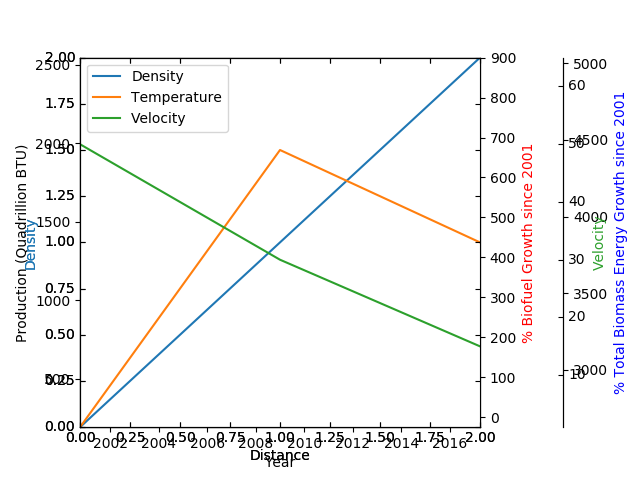

In [4]:
# from mpl_toolkits.axes_grid1 import host_subplot
# import mpl_toolkits.axisartist as AA
# import matplotlib.pyplot as plt

fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()


ytop_factor = 9
ybot_factor = 0.25
percent_gap_on_top = (ytop_factor+1)*biofuels_production[0]
percent_gap_bottom = (1-ybot_factor)*biofuels_production[0]


host.set_xlim(left=years[0]-0.25, right=years[-1]+0.25)
host.set_ylim(bottom=percent_gap_bottom, top=percent_gap_on_top)
par1.set_ylim(bottom=-ybot_factor*100, top=ytop_factor*100)
par2.set_ylim(total_biomass_energy_production[0], total_biomass_energy_production[-1])

# axes labels
host.set_xlabel('Year')
host.set_ylabel('Production (Quadrillion BTU)')
par1.set_ylabel('% Biofuel Growth since 2001')
par2.set_ylabel('% Total Biomass Energy Growth since 2001')

p1, = host.plot(years, biofuels_production,'ko', label="biofuels_production")
p2, = par1.plot(years, biofuel_percent_growth_rel_to_2001,'r', label="biofuel_percent_growth_rel_to_2001")
p3, = par2.plot(years, total_biomass_energy_production,'bo', label="total_biomass_energy_production")

par1.set_ylim(bottom=-ybot_factor*100, top=ytop_factor*100)
par1.set_yticks(np.arange(0, (ytop_factor+1)*100, 100))
par1.set_yticklabels([str(i) for i in np.arange(0, (ytop_factor+1)*100, 100)])


lns = [p1, p2, p3]
host.legend(handles=lns, loc='best')

par2.spines["right"].set_position(("axes", 1.2))
par2.spines['right'].set_position(('outward', 60))
# par2.xaxis.set_ticks()

# par2.set_ylim(total_biomass_energy_production[0], total_biomass_energy_production[-1])


host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())


plt.draw()
plt.show()

# # fig, ax1 = plt.subplots()

# ax1.set_xlim(left=years[0]-0.25, right=years[-1]+0.25)

# ytop_factor = 9
# ybot_factor = 0.25

# percent_gap_on_top = (ytop_factor+1)*biofuels_production[0]
# percent_gap_bottom = (1-ybot_factor)*biofuels_production[0]
# ax1.set_ylim(bottom=percent_gap_bottom, top=percent_gap_on_top)

# ax1.plot(years, biofuels_production,'ko')
# ax1.set_xlabel('Year')
# ax1.set_ylabel('Production (Quadrillion BTU)')
# ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
# # ax1.tick_params(axis='y',which='minor',)

# plt.xticks([years[i] for i in range(0,17,1)],[str(i) if i%2==1 else '' for i in years])
# # ax1.set_xticks(years)
# # ax1.set_xticks([years[i] for i in range(0,17)], minor=True)
# # ax1.set_xticklabels([years[i] for i in range(0,17,1)],rotation=45,)

# # set secondary x axis
# ax2 = ax1.twinx()
# ax2.set_ylabel('% Growth since 2001')
# plt.yticks(np.arange(0, (ytop_factor+1)*100, 100), [str(i) for i in np.arange(0, (ytop_factor+1)*100, 100)])
# ax2.set_ylim(bottom=-ybot_factor*100, top=ytop_factor*100)
# locs, labels = plt.yticks()
# ax2.plot(years, biofuel_percent_growth_rel_to_2001,'k')

# # print(locs, labels[:])


In [6]:
percent_gap_bottom

190.83975

In [5]:
locs = [years[i] for i in range(0,17,2)]
labels= [str(i) for i in locs]
print(labels)

['2001', '2003', '2005', '2007', '2009', '2011', '2013', '2015', '2017']


In [6]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right",
                                    axes=par2,
                                    offset=(offset, 0))

par2.axis["right"].toggle(all=True)

host.set_xlim(0, 2)
host.set_ylim(0, 2)

host.set_xlabel("Distance")
host.set_ylabel("Density")
par1.set_ylabel("Temperature")
par2.set_ylabel("Velocity")

p1, = host.plot([0, 1, 2], [0, 1, 2], label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2], label="Temperature")
p3, = par2.plot([0, 1, 2], [50, 30, 15], label="Velocity")

par1.set_ylim(0, 4)
par2.set_ylim(1, 65)

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())

# plt.draw()
# plt.show()

<IPython.core.display.Javascript object>


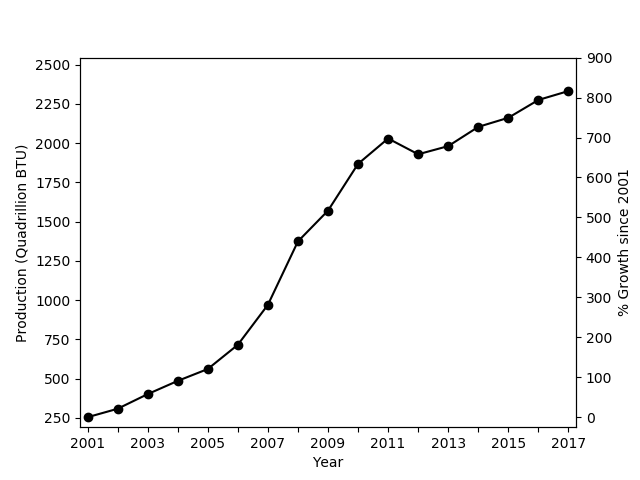

In [7]:



fig, ax1 = plt.subplots()
ax1.set_xlim(left=years[0]-0.25, right=years[-1]+0.25)

ytop_factor = 9
ybot_factor = 0.25

percent_gap_on_top = (ytop_factor+1)*biofuels_production[0]
percent_gap_bottom = (1-ybot_factor)*biofuels_production[0]
ax1.set_ylim(bottom=percent_gap_bottom, top=percent_gap_on_top)

ax1.plot(years, biofuels_production,'ko')
ax1.set_xlabel('Year')
ax1.set_ylabel('Production (Quadrillion BTU)')
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
# ax1.tick_params(axis='y',which='minor',)

plt.xticks([years[i] for i in range(0,17,1)],[str(i) if i%2==1 else '' for i in years])
# ax1.set_xticks(years)
# ax1.set_xticks([years[i] for i in range(0,17)], minor=True)
# ax1.set_xticklabels([years[i] for i in range(0,17,1)],rotation=45,)

# set secondary x axis
ax2 = ax1.twinx()
ax2.set_ylabel('% Growth since 2001')
plt.yticks(np.arange(0, (ytop_factor+1)*100, 100), [str(i) for i in np.arange(0, (ytop_factor+1)*100, 100)])
ax2.set_ylim(bottom=-ybot_factor*100, top=ytop_factor*100)
locs, labels = plt.yticks()
ax2.plot(years, biofuel_percent_growth_rel_to_2001,'k')

# print(locs, labels[:])

<IPython.core.display.Javascript object>


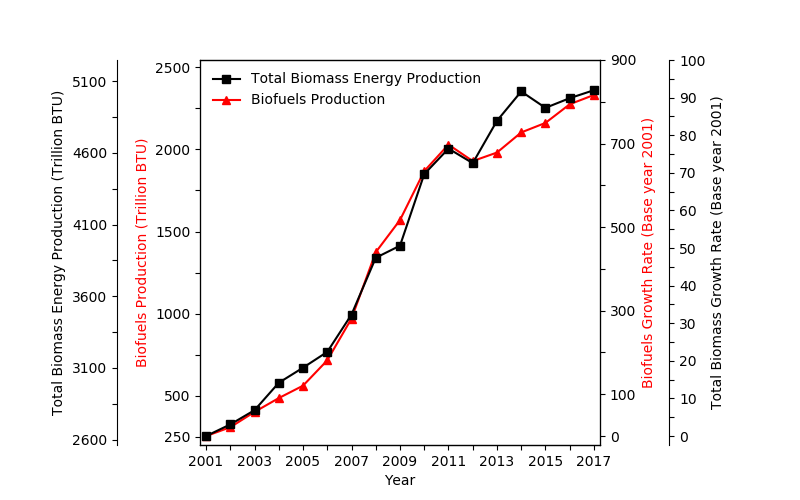

2561.794851725291


In [10]:
# def make_patch_spines_invisible(ax):
#     ax.set_frame_on(True)
#     ax.patch.set_visible(False)
#     for sp in ax.spines.values():
#         sp.set_visible(False)


fig, host = plt.subplots(figsize=(8,5))
fig.subplots_adjust(left=0.25,right=0.75)

# % growth for biofuels
par1 = host.twinx()
# total biomass prod
par2 = host.twinx()
# % growth for total biomass
par3 = host.twinx()

# set axes placement
par2.spines['left'].set_position(('outward', 60)) 
par2.spines['left'].set_visible(True) 
par2.yaxis.set_label_position('left') 
par2.yaxis.set_ticks_position('left')

par3.spines['right'].set_position(('outward', 50))
par3.spines['right'].set_visible(True) 
par3.yaxis.set_label_position('right') 
par3.yaxis.set_ticks_position('right')

# Plot the Data
biofuelplot,   = host.plot(years, biofuels_production, 'r^-', label='Biofuels Production')
# biofuelgrowth, = par1.plot(years, biofuel_percent_growth_rel_to_2001, 'r^-', label='')
totalplot,     = par2.plot(years, total_biomass_energy_production, 'ks-', label='Total Biomass Energy Production')
# totalgrowth,   = par3.plot(years, total_biomass_percent_growth_rel_to_2001, 'ks-', label='')
# p4, = par2.plot(years, total_biomass_percent_growth_rel_to_2001, 'k-', label='total%')

# ytop_factor = 9
# ybot_factor = 0.25

# percent_gap_on_top = (ytop_factor+1)
# percent_gap_bottom = (1-ybot_factor)
# # ax1.set_ylim(bottom=percent_gap_bottom, top=percent_gap_on_top)

# # set axes limits
# host.set_xlim(left=years[0]-0.25, right=years[-1]+0.25)
# host.set_ylim(bottom=percent_gap_bottom*biofuels_production[0], top=percent_gap_on_top*biofuels_production[0])
# par1.set_ylim(bottom=-ybot_factor*100, top=ytop_factor*100)
# # par2.set_ylim((1-ybot_factor)*total_biomass_energy_production[0], 1.25*total_biomass_energy_production[-1])
# par2.set_ylim(bottom = (1-(ybot_factor*100)/(ytop_factor*100))*total_biomass_energy_production[0],
#               top = 5248.5)
# par3.set_ylim(bottom=-100*(ybot_factor*100)/(ytop_factor*100), top=100)

# 


# TO CHANGE WHERE ZERO IS, JUST CHANGE THE VALUE IN biofuels_limits[0] ONLY

CHANGE_VAL = 200

biofuels_limits = [CHANGE_VAL, 10*biofuels_production[0]]
biofuels_pct_limits = [ 100*(biofuels_limits[0]/biofuels_production[0] -1), 100*(biofuels_limits[1]/biofuels_production[0] -1)]

ymin_b = biofuels_limits[0]
ymax_pb = biofuels_pct_limits[1]
y_pb = biofuel_percent_growth_rel_to_2001[0]
y_b = min(biofuels_production)

y_pt = total_biomass_percent_growth_rel_to_2001[0]
y_t = min(total_biomass_energy_production)

# total_limits[1]
total_limits1 = 2*total_biomass_energy_production[0]

ymax_pt = 100*(total_limits1/total_biomass_energy_production[0] -1) 

K = (y_pb -  (ymin_b/y_b - 1))/(ymax_pb - (ymin_b/y_b - 1))

# Solving for X yields the following expression:

X = y_t * (1+(ymax_pt*(y_pb - K - y_pt)/(K+1)))

print(X)

# biofuels_limits = [200, 10*biofuels_production[0]]
# biofuels_pct_limits = [ 100*(biofuels_limits[0]/biofuels_production[0] -1), 100*(biofuels_limits[1]/biofuels_production[0] -1)]

total_limits = [X, 2*total_biomass_energy_production[0] ]
total_pct_limits = [ 100*(total_limits[0]/total_biomass_energy_production[0] -1), 100*(total_limits[1]/total_biomass_energy_production[0] -1) ]

# set axes limits
host.set_xlim(left=years[0]-0.25, right=years[-1]+0.25)
host.set_ylim(bottom=biofuels_limits[0], 
              top=biofuels_limits[1])
par1.set_ylim(bottom=biofuels_pct_limits[0], 
              top=biofuels_pct_limits[1])
par2.set_ylim(bottom = total_limits[0],
              top = total_limits[1])
par3.set_ylim(bottom=total_pct_limits[0],
              top=total_pct_limits[1])


# host.set_xlim(left=years[0]-0.25, right=years[-1]+0.25)
# host.set_ylim(bottom=min(ybot_factor*min(biofuels_production),240), 
#               top=max(ytop_factor*max(biofuels_production),2500))
# par1.set_ylim(bottom=-100*(biofuels_production[0]-240)/240, 
#               top=max(ytop_factor*max(biofuel_percent_growth_rel_to_2001),900))
# par2.set_ylim(bottom = min(min(total_biomass_energy_production),2600),
#               top = ytop_factor*max(total_biomass_energy_production))
# par3.set_ylim(bottom=-100*(total_biomass_energy_production[0]-2600)/2600,
#               top=ytop_factor*max(total_biomass_percent_growth_rel_to_2001))


# set tick locations
host.set_xticks(ticks=[years[i] for i in range(0,17,1)])
host.set_yticks(ticks=np.arange(250,2750,250))
par1.set_yticks(ticks=np.arange(0,1000,100))
par2.set_yticks(ticks=[i for i in np.arange(2600,5350, 250)])
par3.set_yticks(ticks = np.arange(0,105, 5))

# set tick labels
host.set_xticklabels(labels=[str(i) if i%2==1 else '' for i in years])
host.set_yticklabels(labels=[str(i) if i%100==0 else str(i) if i==250 else '' for i in np.arange(250,2750,250)])
par1.set_yticklabels(labels=[str(i) if i%200!=0 else str(i) if i==0 else '' for i in np.arange(0,1000,100)])
par2.set_yticklabels(labels=[str(i) if i%100==0 else '' for i in np.arange(2600,5350, 250)] )
par3.set_yticklabels(labels=[str(i) if i%10==0 else '' for i in np.arange(0,105,5)])

# set axes labels
host.set_xlabel('Year')
host.set_ylabel('Biofuels Production (Trillion BTU)')
par1.set_ylabel('Biofuels Growth Rate (Base year 2001)')
par2.set_ylabel('Total Biomass Energy Production (Trillion BTU)')
par3.set_ylabel('Total Biomass Growth Rate (Base year 2001)')

host.yaxis.label.set_color(biofuelplot.get_color())
par1.yaxis.label.set_color(biofuelplot.get_color())
# par1.yaxis.label.set_color(biofuelgrowth.get_color())
par2.yaxis.label.set_color(totalplot.get_color())
# par3.yaxis.label.set_color(totalgrowth.get_color())

# par3.yaxis.label.set_color(p4.get_color())
# tick size and width
# tkw = dict(size=4, width=1)
# host.tick_params(axis='y', colors=p1.get_color(), **tkw)
# par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
# par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
# par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
# host.tick_params(axis='x', **tkw)

lines = [totalplot, biofuelplot ]

host.legend(lines, [l.get_label() for l in lines],frameon=False)

plt.savefig('thesis_plot_transparent.svg', format='svg',dpi=1200, transparent=True)

To make the %growth and %total match up at zero percent, we need to do some math in order to set all the y limits correctly.

1. First pick ymin_b for biofuels production, say 200
2. Pick the ymax_pb for %growth of biofuels, say 900% = (10 * y[0] -1) * 100%
3. Pick ymax_pt for %total growth, say 100

Now we need to find ymin_pt, we assume the y_pt[0] =  y_pb[0] = 0% 

y_b[0] is the first element in biofuel production
y_t[0] is the first element in total biomass energy production

This boils down to solving the following equation for X:

(y_pb[0] -  (ymin_b/y_b[0] - 1))/(ymax_pb - (ymin_b/y_b[0] - 1)) = (y_pt[0] - (X/y_t[0] - 1))/(ymax_pt - (X/y_t[0] - 1))

Which can be reduced to the following:

(X/y_t[0] - 1)) = (ymax_pt*(y_pb[0] - K - y_pt[0])/(K+1)

Where K is equal to the LHS of the above equation: (y_pb[0] -  (ymin_b/y_b[0] - 1))/(ymax_pb - (ymin_b/y_b[0] - 1))

Solving for X yields the following expression:

X = y_t[0] * (1+(ymax_pt*(y_pb[0] - K - y_pt[0])/(K+1)))

and the full expression is:

X = y_t[0] * (1+(ymax_pt*(y_pb[0] - (y_pb[0] -  (ymin_b/y_b[0] - 1))/(ymax_pb - (ymin_b/y_b[0] - 1)) - y_pt[0])/((y_pb[0] -  (ymin_b/y_b[0] - 1))/(ymax_pb - (ymin_b/y_b[0] - 1))+1))

Sorry, not enough time to format with Latex

In [11]:
ybot_factor*min(biofuels_production)

63.61325

In [12]:
max(ytop_factor*max(biofuel_percent_growth_rel_to_2001),900)

7347.001214369647

In [172]:
max(ytop_factor*max(biofuels_production),2500)

2500

In [173]:
ybot_factor*min(biofuels_production)

241.73035

In [174]:
ytop_factor*max(total_biomass_percent_growth_rel_to_2001)

96.57002883206145

In [175]:
max(ytop_factor*max(total_biomass_percent_growth_rel_to_2001), 100)

100

In [176]:
100 -1.05*100

-5.0

In [180]:
 min(biofuels_production)

254.453

In [186]:
ybot_factor*min(biofuels_production)

241.73035

In [189]:
min(total_biomass_energy_production)

2624.162

In [194]:
import pandas as pd

In [220]:
df = pd.DataFrame(np.array([biofuels_production,biofuel_percent_growth_rel_to_2001, 
                            total_biomass_energy_production, total_biomass_percent_growth_rel_to_2001]).T, 
                  columns=['biofuels_production', 'biofuel_percent_growth_rel_to_2001',
                          'total_biomass_energy_production', 'total_biomass_percent_growth_rel_to_2001'], index=years)
df.head()

,biofuels_production,biofuel_percent_growth_rel_to_2001,total_biomass_energy_production,total_biomass_percent_growth_rel_to_2001
2001,254.453,0.000000,2624.162,0.000000
2002,308.118,21.090339,2705.406,3.095998
2003,401.394,57.747796,2804.778,6.882807
2004,485.722,90.888691,2996.017,14.170429
2005,561.270,120.579046,3101.186,18.178146


<Figure size 432x288 with 0 Axes>

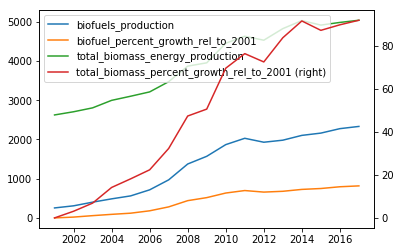

In [242]:
%matplotlib inline
# df.biofuels_production.plot()
# df.biofuel_percent_growth_rel_to_2001.plot(secondary_y=True, style='g')
plt.figure()
ax = df.plot(secondary_y='total_biomass_percent_growth_rel_to_2001')
# df.total_biomass_energy_production.plot()
# df.total_biomass_percent_growth_rel_to_2001.plot(secondary_y=True)
# plt.show()

In [21]:
100*(biofuels_limits[1]/biofuels_production[0] -1)

900.0

In [22]:
100*(total_limits[1]/total_biomass_energy_production[0] -1) 

100.0

In [11]:
print(os.getcwd())

F:\PythonProjects\IRAS\Thesis plot
